In [13]:
# load dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [14]:
# fix random seed for reproducibility
# numpy.random.seed(7)

# California Coal Production

In [15]:
# load data
ca_coal = pd.read_csv('state_cleaned1.csv', usecols=["CLPRB CA"], engine='python')
ca_coal

,CLPRB CA
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
# load data
ca_coal = pandas.read_csv('state_cleaned1.csv', usecols=["CLPRB CA"], engine='python')

ca_coal = ca_coal.values
ca_coal = ca_coal.astype('float32')


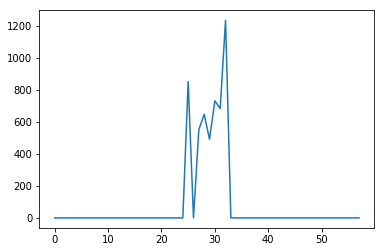

In [17]:
# load data
ca_coal = pd.read_csv('state_cleaned1.csv', usecols=["CLPRB CA"], engine='python')

plt.plot(ca_coal)
plt.show()

In [18]:
scaler_ca_coal = MinMaxScaler(feature_range=(0, 1))
ca_coal = scaler_ca_coal.fit_transform(ca_coal)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
# split into train and test sets
train_size_ca_coal = int(len(ca_coal) * 0.67)
test_size_ca_coal = len(ca_coal) - train_size_ca_coal
train_ca_coal, test_ca_coal = ca_coal[0:train_size_ca_coal,:], ca_coal[train_size_ca_coal:len(ca_coal),:]

In [20]:
# convert an array of values into a dataset matrix
def create_ca_coal(ca_coal, look_back=1):
	dataX_ca_coal, dataY_ca_coal = [], []
	for i_ca_coal in range(len(ca_coal)-look_back-1):
		a_ca_coal = ca_coal[i_ca_coal:(i_ca_coal+look_back), 0]
		dataX_ca_coal.append(a_ca_coal)
		dataY_ca_coal.append(ca_coal[i_ca_coal + look_back, 0])
	return numpy.array(dataX_ca_coal), numpy.array(dataY_ca_coal)

In [21]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_coal, trainY_ca_coal = create_ca_coal(train_ca_coal, look_back)
testX_ca_coal, testY_ca_coal = create_ca_coal(test_ca_coal, look_back)

In [22]:
# reshape input to be [samples, time steps, features]
trainX_ca_coal = numpy.reshape(trainX_ca_coal, (trainX_ca_coal.shape[0], 1, trainX_ca_coal.shape[1]))
testX_ca_coal = numpy.reshape(testX_ca_coal, (testX_ca_coal.shape[0], 1, testX_ca_coal.shape[1]))

In [23]:
# create and fit the LSTM network
model_ca_coal = Sequential()
model_ca_coal.add(LSTM(4, input_shape=(1, look_back)))
model_ca_coal.add(Dense(1))
model_ca_coal.compile(loss='mean_squared_error', optimizer='adam')
model_ca_coal.fit(trainX_ca_coal, trainY_ca_coal, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0828
Epoch 2/100
 - 0s - loss: 0.0771
Epoch 3/100
 - 0s - loss: 0.0729
Epoch 4/100
 - 0s - loss: 0.0701
Epoch 5/100
 - 0s - loss: 0.0682
Epoch 6/100
 - 0s - loss: 0.0670
Epoch 7/100
 - 0s - loss: 0.0660
Epoch 8/100
 - 0s - loss: 0.0647
Epoch 9/100
 - 0s - loss: 0.0645
Epoch 10/100
 - 0s - loss: 0.0635
Epoch 11/100
 - 0s - loss: 0.0628
Epoch 12/100
 - 0s - loss: 0.0621
Epoch 13/100
 - 0s - loss: 0.0616
Epoch 14/100
 - 0s - loss: 0.0610
Epoch 15/100
 - 0s - loss: 0.0605
Epoch 16/100
 - 0s - loss: 0.0599
Epoch 17/100
 - 0s - loss: 0.0595
Epoch 18/100
 - 0s - loss: 0.0592
Epoch 19/100
 - 0s - loss: 0.0589
Epoch 20/100
 - 0s - loss: 0.0580
Epoch 21/100
 - 0s - loss: 0.0580
Epoch 22/100
 - 0s - loss: 0.0575
Epoch 23/100
 - 0s - loss: 0.0567
Epoch 24/100
 - 0s - loss: 0.0565
Epoch 25/100
 - 0s - loss: 0.0560
Epoch 26/100
 - 0s - loss: 0.0558
Epoch 27/100
 - 0s - loss: 0.0553
Epoch 28/100
 - 0s - loss: 0.0550
Epoch 29/100
 - 0s - loss: 0.0547
Epoch 30/100
 - 0s - lo

In [24]:
# make predictions
trainPredict_ca_coal = model_ca_coal.predict(trainX_ca_coal)
testPredict_ca_coal = model_ca_coal.predict(testX_ca_coal)

In [25]:
# invert predictions
trainPredict_ca_coal = scaler_ca_coal.inverse_transform(trainPredict_ca_coal)
trainY_ca_coal = scaler_ca_coal.inverse_transform([trainY_ca_coal])
testPredict_ca_coal = scaler_ca_coal.inverse_transform(testPredict_ca_coal)
testY_ca_coal = scaler_ca_coal.inverse_transform([testY_ca_coal])
# calculate root mean squared error
trainScore_ca_coal = math.sqrt(mean_squared_error(trainY_ca_coal[0], trainPredict_ca_coal[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_coal))
testScore_ca_coal = math.sqrt(mean_squared_error(testY_ca_coal[0], testPredict_ca_coal[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_coal))

Train Score: 266.42 RMSE
Test Score: 76.04 RMSE


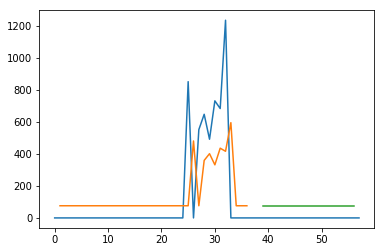

In [26]:
# shift train predictions for plotting
trainPredictPlot_ca_coal = numpy.empty_like(ca_coal)
trainPredictPlot_ca_coal[:, :] = numpy.nan
trainPredictPlot_ca_coal[look_back:len(trainPredict_ca_coal)+look_back, :] = trainPredict_ca_coal
# shift test predictions for plotting
testPredictPlot_ca_coal = numpy.empty_like(ca_coal)
testPredictPlot_ca_coal[:, :] = numpy.nan
testPredictPlot_ca_coal[len(trainPredict_ca_coal)+(look_back*2)+1:len(ca_coal)-1, :] = testPredict_ca_coal
# plot baseline and predictions
plt.plot(scaler_ca_coal.inverse_transform(ca_coal))
plt.plot(trainPredictPlot_ca_coal)
plt.plot(testPredictPlot_ca_coal)
plt.show()


In [27]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_coal, trainY_ca_coal = create_ca_coal(ca_coal, look_back)
trainX_ca_coal = numpy.reshape(trainX_ca_coal, (trainX_ca_coal.shape[0], 1, trainX_ca_coal.shape[1]))

# re-create and fit the LSTM network
model_ca_coal = Sequential()
model_ca_coal.add(LSTM(4, input_shape=(1, look_back)))
model_ca_coal.add(Dense(1))
model_ca_coal.compile(loss='mean_squared_error', optimizer='adam')
model_ca_coal.fit(trainX_ca_coal, trainY_ca_coal, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0611
Epoch 2/100
 - 0s - loss: 0.0583
Epoch 3/100
 - 0s - loss: 0.0569
Epoch 4/100
 - 0s - loss: 0.0543
Epoch 5/100
 - 0s - loss: 0.0524
Epoch 6/100
 - 0s - loss: 0.0507
Epoch 7/100
 - 0s - loss: 0.0488
Epoch 8/100
 - 0s - loss: 0.0470
Epoch 9/100
 - 0s - loss: 0.0455
Epoch 10/100
 - 0s - loss: 0.0435
Epoch 11/100
 - 0s - loss: 0.0422
Epoch 12/100
 - 0s - loss: 0.0402
Epoch 13/100
 - 0s - loss: 0.0387
Epoch 14/100
 - 0s - loss: 0.0375
Epoch 15/100
 - 0s - loss: 0.0357
Epoch 16/100
 - 0s - loss: 0.0343
Epoch 17/100
 - 0s - loss: 0.0329
Epoch 18/100
 - 0s - loss: 0.0316
Epoch 19/100
 - 0s - loss: 0.0304
Epoch 20/100
 - 0s - loss: 0.0294
Epoch 21/100
 - 0s - loss: 0.0285
Epoch 22/100
 - 0s - loss: 0.0272
Epoch 23/100
 - 0s - loss: 0.0264
Epoch 24/100
 - 0s - loss: 0.0257
Epoch 25/100
 - 0s - loss: 0.0246
Epoch 26/100
 - 0s - loss: 0.0241
Epoch 27/100
 - 0s - loss: 0.0230
Epoch 28/100
 - 0s - loss: 0.0224
Epoch 29/100
 - 0s - loss: 0.0216
Epoch 30/100
 - 0s - lo

58


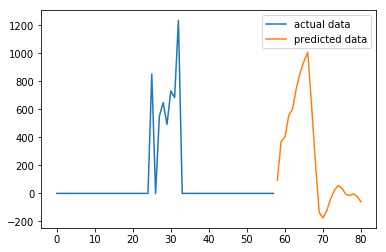

In [28]:
# making future prediction
flatten_ca_coal = ca_coal.reshape(-1)
val_ca_coal = flatten_ca_coal[-look_back:] # last batch in the training data
pred_list_ca_coal = []
for i_ca_coal in range(23): # predict the next 23 points
    pred_ca_coal = model_ca_coal.predict(val_ca_coal.reshape(1,1,look_back))
    pred_list_ca_coal = np.append(pred_list_ca_coal,pred_ca_coal)
    val_ca_coal = np.append(np.delete(val_ca_coal, 0),pred_ca_coal) # update the data batch to be fed in the next iteration
pred_list_ca_coal = pred_list_ca_coal.reshape(pred_list_ca_coal.shape[0],1)

# invert prediction
pred_list_ca_coal = scaler_ca_coal.inverse_transform(pred_list_ca_coal)

# plot
ca_coal_len = len(ca_coal)
print(ca_coal_len)
plt.plot(list(range(ca_coal_len)),scaler_ca_coal.inverse_transform(ca_coal),label="actual data")
plt.plot(list(range(ca_coal_len,ca_coal_len+len(pred_list_ca_coal))),pred_list_ca_coal,label="predicted data")
plt.legend()
plt.show()

In [29]:
# pred_list_ca_coal

# California Natural Gas Production

In [30]:
# load data
ca_gas = pd.read_csv('state_cleaned1.csv', usecols=["NGMPB CA"], engine='python' )
ca_gas

,NGMPB CA
0,590504
1,634667
2,643771
3,737636
4,757678
5,753494
6,786837
7,777108
8,815688
9,773239


In [31]:
# load data
ca_gas = pandas.read_csv('state_cleaned1.csv', usecols=["NGMPB CA"], engine='python')

ca_gas = ca_gas.values
ca_gas = ca_gas.astype('float32')

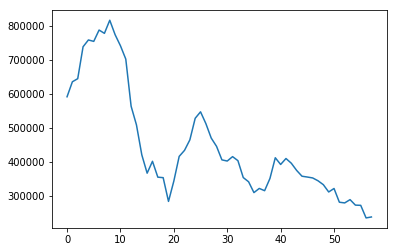

In [32]:
# load data
ca_gas = pd.read_csv('state_cleaned1.csv', usecols=["NGMPB CA"], engine='python')

plt.plot(ca_gas)
plt.show()

In [33]:
scaler_ca_gas = MinMaxScaler(feature_range=(0, 1))
ca_gas = scaler_ca_gas.fit_transform(ca_gas)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
# split into train and test sets
train_size_ca_gas = int(len(ca_gas) * 0.67)
test_size_ca_gas = len(ca_gas) - train_size_ca_gas
train_ca_gas, test_ca_gas = ca_gas[0:train_size_ca_gas,:], ca_gas[train_size_ca_gas:len(ca_gas),:]

In [35]:
# convert an array of values into a dataset matrix
def create_ca_gas(ca_gas, look_back=1):
	dataX_ca_gas, dataY_ca_gas = [], []
	for i_ca_gas in range(len(ca_gas)-look_back-1):
		a_ca_gas = ca_gas[i_ca_gas:(i_ca_gas+look_back), 0]
		dataX_ca_gas.append(a_ca_gas)
		dataY_ca_gas.append(ca_gas[i_ca_gas + look_back, 0])
	return numpy.array(dataX_ca_gas), numpy.array(dataY_ca_gas)

In [36]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_gas, trainY_ca_gas = create_ca_gas(train_ca_gas, look_back)
testX_ca_gas, testY_ca_gas = create_ca_gas(test_ca_gas, look_back)

In [37]:
# reshape input to be [samples, time steps, features]
trainX_ca_gas = numpy.reshape(trainX_ca_gas, (trainX_ca_gas.shape[0], 1, trainX_ca_gas.shape[1]))
testX_ca_gas = numpy.reshape(testX_ca_gas, (testX_ca_gas.shape[0], 1, testX_ca_gas.shape[1]))

In [38]:
# create and fit the LSTM network
model_ca_gas = Sequential()
model_ca_gas.add(LSTM(4, input_shape=(1, look_back)))
model_ca_gas.add(Dense(1))
model_ca_gas.compile(loss='mean_squared_error', optimizer='adam')
model_ca_gas.fit(trainX_ca_gas, trainY_ca_gas, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.2503
Epoch 2/100
 - 0s - loss: 0.2074
Epoch 3/100
 - 0s - loss: 0.1688
Epoch 4/100
 - 0s - loss: 0.1383
Epoch 5/100
 - 0s - loss: 0.1130
Epoch 6/100
 - 0s - loss: 0.0910
Epoch 7/100
 - 0s - loss: 0.0752
Epoch 8/100
 - 0s - loss: 0.0639
Epoch 9/100
 - 0s - loss: 0.0553
Epoch 10/100
 - 0s - loss: 0.0496
Epoch 11/100
 - 0s - loss: 0.0461
Epoch 12/100
 - 0s - loss: 0.0435
Epoch 13/100
 - 0s - loss: 0.0412
Epoch 14/100
 - 0s - loss: 0.0397
Epoch 15/100
 - 0s - loss: 0.0380
Epoch 16/100
 - 0s - loss: 0.0368
Epoch 17/100
 - 0s - loss: 0.0359
Epoch 18/100
 - 0s - loss: 0.0342
Epoch 19/100
 - 0s - loss: 0.0326
Epoch 20/100
 - 0s - loss: 0.0313
Epoch 21/100
 - 0s - loss: 0.0299
Epoch 22/100
 - 0s - loss: 0.0284
Epoch 23/100
 - 0s - loss: 0.0271
Epoch 24/100
 - 0s - loss: 0.0258
Epoch 25/100
 - 0s - loss: 0.0248
Epoch 26/100
 - 0s - loss: 0.0232
Epoch 27/100
 - 0s - loss: 0.0219
Epoch 28/100
 - 0s - loss: 0.0205
Epoch 29/100
 - 0s - loss: 0.0192
Epoch 30/100
 - 0s - lo

In [39]:
# make predictions
trainPredict_ca_gas = model_ca_gas.predict(trainX_ca_gas)
testPredict_ca_gas = model_ca_gas.predict(testX_ca_gas)

In [40]:
# invert predictions
trainPredict_ca_gas = scaler_ca_gas.inverse_transform(trainPredict_ca_gas)
trainY_ca_gas = scaler_ca_gas.inverse_transform([trainY_ca_gas])
testPredict_ca_gas = scaler_ca_gas.inverse_transform(testPredict_ca_gas)
testY_ca_gas = scaler_ca_gas.inverse_transform([testY_ca_gas])
# calculate root mean squared error
trainScore_ca_gas = math.sqrt(mean_squared_error(trainY_ca_gas[0], trainPredict_ca_gas[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_gas))
testScore_ca_gas = math.sqrt(mean_squared_error(testY_ca_gas[0], testPredict_ca_gas[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_gas))


Train Score: 46639.73 RMSE
Test Score: 25678.12 RMSE


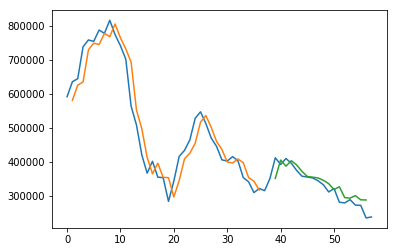

In [41]:
# shift train predictions for plotting
trainPredictPlot_ca_gas = numpy.empty_like(ca_gas)
trainPredictPlot_ca_gas[:, :] = numpy.nan
trainPredictPlot_ca_gas[look_back:len(trainPredict_ca_gas)+look_back, :] = trainPredict_ca_gas
# shift test predictions for plotting
testPredictPlot_ca_gas = numpy.empty_like(ca_gas)
testPredictPlot_ca_gas[:, :] = numpy.nan
testPredictPlot_ca_gas[len(trainPredict_ca_gas)+(look_back*2)+1:len(ca_gas)-1, :] = testPredict_ca_gas
# plot baseline and predictions
plt.plot(scaler_ca_gas.inverse_transform(ca_gas))
plt.plot(trainPredictPlot_ca_gas)
plt.plot(testPredictPlot_ca_gas)
plt.show()


In [42]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_gas, trainY_ca_gas = create_ca_gas(ca_gas, look_back)
trainX_ca_gas = numpy.reshape(trainX_ca_gas, (trainX_ca_gas.shape[0], 1, trainX_ca_gas.shape[1]))

# re-create and fit the LSTM network
model_ca_gas = Sequential()
model_ca_gas.add(LSTM(4, input_shape=(1, look_back)))
model_ca_gas.add(Dense(1))
model_ca_gas.compile(loss='mean_squared_error', optimizer='adam')
model_ca_gas.fit(trainX_ca_gas, trainY_ca_gas, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0344
Epoch 2/100
 - 0s - loss: 0.0155
Epoch 3/100
 - 0s - loss: 0.0120
Epoch 4/100
 - 0s - loss: 0.0101
Epoch 5/100
 - 0s - loss: 0.0093
Epoch 6/100
 - 0s - loss: 0.0081
Epoch 7/100
 - 0s - loss: 0.0075
Epoch 8/100
 - 0s - loss: 0.0068
Epoch 9/100
 - 0s - loss: 0.0062
Epoch 10/100
 - 0s - loss: 0.0057
Epoch 11/100
 - 0s - loss: 0.0053
Epoch 12/100
 - 0s - loss: 0.0051
Epoch 13/100
 - 0s - loss: 0.0049
Epoch 14/100
 - 0s - loss: 0.0045
Epoch 15/100
 - 0s - loss: 0.0042
Epoch 16/100
 - 0s - loss: 0.0039
Epoch 17/100
 - 0s - loss: 0.0037
Epoch 18/100
 - 0s - loss: 0.0035
Epoch 19/100
 - 0s - loss: 0.0032
Epoch 20/100
 - 0s - loss: 0.0030
Epoch 21/100
 - 0s - loss: 0.0029
Epoch 22/100
 - 0s - loss: 0.0028
Epoch 23/100
 - 0s - loss: 0.0027
Epoch 24/100
 - 0s - loss: 0.0025
Epoch 25/100
 - 0s - loss: 0.0023
Epoch 26/100
 - 0s - loss: 0.0024
Epoch 27/100
 - 0s - loss: 0.0023
Epoch 28/100
 - 0s - loss: 0.0022
Epoch 29/100
 - 0s - loss: 0.0023
Epoch 30/100
 - 0s - lo

58


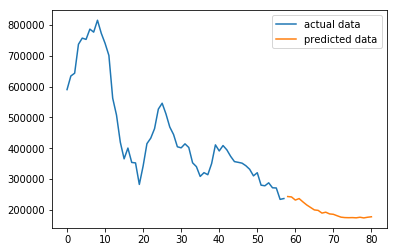

In [43]:
# making future prediction
flatten_ca_gas = ca_gas.reshape(-1)
val_ca_gas = flatten_ca_gas[-look_back:] # last batch in the training data
pred_list_ca_gas = []
for i_ca_gas in range(23): # predict the next 23 points
    pred_ca_gas = model_ca_gas.predict(val_ca_gas.reshape(1,1,look_back))
    pred_list_ca_gas = np.append(pred_list_ca_gas,pred_ca_gas)
    val_ca_gas = np.append(np.delete(val_ca_gas, 0),pred_ca_gas) # update the data batch to be fed in the next iteration
pred_list_ca_gas = pred_list_ca_gas.reshape(pred_list_ca_gas.shape[0],1)

# invert prediction
pred_list_ca_gas = scaler_ca_gas.inverse_transform(pred_list_ca_gas)

# plot
ca_gas_len = len(ca_gas)
print(ca_gas_len)
plt.plot(list(range(ca_gas_len)),scaler_ca_gas.inverse_transform(ca_gas),label="actual data")
plt.plot(list(range(ca_gas_len,ca_gas_len+len(pred_list_ca_gas))),pred_list_ca_gas,label="predicted data")
plt.legend()
plt.show()

In [44]:
# pred_list_ca_gas

# California Crude Oil Production

In [45]:
# load data
ca_crude = pd.read_csv('state_cleaned1.csv', usecols=["PAPRB CA"], engine='python' )
ca_crude

,PAPRB CA
0,1771042
1,1737732
2,1720222
3,1745266
4,1740052
5,1835282
6,2002711
7,2083470
8,2165847
9,2119020


In [56]:
# load data
ca_crude = pandas.read_csv('state_cleaned1.csv', usecols=["PAPRB CA"], engine='python')

ca_crude = ca_crude.values
ca_crude = ca_crude.astype('float32')

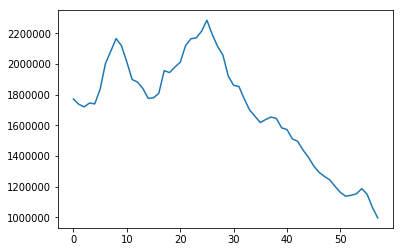

In [57]:
# load data
ca_crude = pd.read_csv('state_cleaned1.csv', usecols=["PAPRB CA"], engine='python')

plt.plot(ca_crude)
plt.show()

In [58]:
scaler_ca_crude = MinMaxScaler(feature_range=(0, 1))
ca_crude = scaler_ca_crude.fit_transform(ca_crude)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [59]:
# split into train and test sets
train_size_ca_crude = int(len(ca_crude) * 0.67)
test_size_ca_crude = len(ca_crude) - train_size_ca_crude
train_ca_crude, test_ca_crude = ca_crude[0:train_size_ca_crude,:], ca_crude[train_size_ca_crude:len(ca_crude),:]

In [63]:
# convert an array of values into a dataset matrix
def create_ca_crude(ca_crude, look_back=1):
	dataX_ca_crude, dataY_ca_crude = [], []
	for i_ca_crude in range(len(ca_crude)-look_back-1):
		a_ca_crude = ca_crude[i_ca_crude:(i_ca_crude+look_back), 0]
		dataX_ca_crude.append(a_ca_crude)
		dataY_ca_crude.append(ca_crude[i_ca_crude + look_back, 0])
	return numpy.array(dataX_ca_crude), numpy.array(dataY_ca_crude)

In [64]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_crude, trainY_ca_crude = create_ca_crude(train_ca_crude, look_back)
testX_ca_crude, testY_ca_crude = create_ca_crude(test_ca_crude, look_back)

In [66]:
# reshape input to be [samples, time steps, features]
trainX_ca_crude = numpy.reshape(trainX_ca_crude, (trainX_ca_crude.shape[0], 1, trainX_ca_crude.shape[1]))
testX_ca_crude = numpy.reshape(testX_ca_crude, (testX_ca_crude.shape[0], 1, testX_ca_crude.shape[1]))

In [67]:
# create and fit the LSTM network
model_ca_crude = Sequential()
model_ca_crude.add(LSTM(4, input_shape=(1, look_back)))
model_ca_crude.add(Dense(1))
model_ca_crude.compile(loss='mean_squared_error', optimizer='adam')
model_ca_crude.fit(trainX_ca_crude, trainY_ca_crude, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.5207
Epoch 2/100
 - 0s - loss: 0.3968
Epoch 3/100
 - 0s - loss: 0.2900
Epoch 4/100
 - 0s - loss: 0.1997
Epoch 5/100
 - 0s - loss: 0.1304
Epoch 6/100
 - 0s - loss: 0.0789
Epoch 7/100
 - 0s - loss: 0.0453
Epoch 8/100
 - 0s - loss: 0.0261
Epoch 9/100
 - 0s - loss: 0.0158
Epoch 10/100
 - 0s - loss: 0.0115
Epoch 11/100
 - 0s - loss: 0.0094
Epoch 12/100
 - 0s - loss: 0.0087
Epoch 13/100
 - 0s - loss: 0.0084
Epoch 14/100
 - 0s - loss: 0.0083
Epoch 15/100
 - 0s - loss: 0.0082
Epoch 16/100
 - 0s - loss: 0.0081
Epoch 17/100
 - 0s - loss: 0.0081
Epoch 18/100
 - 0s - loss: 0.0083
Epoch 19/100
 - 0s - loss: 0.0080
Epoch 20/100
 - 0s - loss: 0.0079
Epoch 21/100
 - 0s - loss: 0.0078
Epoch 22/100
 - 0s - loss: 0.0078
Epoch 23/100
 - 0s - loss: 0.0077
Epoch 24/100
 - 0s - loss: 0.0076
Epoch 25/100
 - 0s - loss: 0.0076
Epoch 26/100
 - 0s - loss: 0.0075
Epoch 27/100
 - 0s - loss: 0.0074
Epoch 28/100
 - 0s - loss: 0.0074
Epoch 29/100
 - 0s - loss: 0.0073
Epoch 30/100
 - 0s - lo

In [69]:
# make predictions
trainPredict_ca_crude = model_ca_crude.predict(trainX_ca_crude)
testPredict_ca_crude = model_ca_crude.predict(testX_ca_crude)

In [70]:
# invert predictions
trainPredict_ca_crude = scaler_ca_crude.inverse_transform(trainPredict_ca_crude)
trainY_ca_crude = scaler_ca_crude.inverse_transform([trainY_ca_crude])
testPredict_ca_crude = scaler_ca_crude.inverse_transform(testPredict_ca_crude)
testY_ca_crude = scaler_ca_crude.inverse_transform([testY_ca_crude])
# calculate root mean squared error
trainScore_ca_crude = math.sqrt(mean_squared_error(trainY_ca_crude[0], trainPredict_ca_crude[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_crude))
testScore_ca_crude = math.sqrt(mean_squared_error(testY_ca_crude[0], testPredict_ca_crude[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_crude))

Train Score: 75419.84 RMSE
Test Score: 195335.21 RMSE


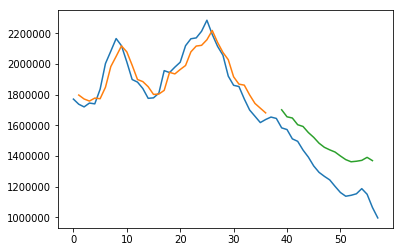

In [71]:
# shift train predictions for plotting
trainPredictPlot_ca_crude = numpy.empty_like(ca_crude)
trainPredictPlot_ca_crude[:, :] = numpy.nan
trainPredictPlot_ca_crude[look_back:len(trainPredict_ca_crude)+look_back, :] = trainPredict_ca_crude
# shift test predictions for plotting
testPredictPlot_ca_crude = numpy.empty_like(ca_crude)
testPredictPlot_ca_crude[:, :] = numpy.nan
testPredictPlot_ca_crude[len(trainPredict_ca_crude)+(look_back*2)+1:len(ca_crude)-1, :] = testPredict_ca_crude
# plot baseline and predictions
plt.plot(scaler_ca_crude.inverse_transform(ca_crude))
plt.plot(trainPredictPlot_ca_crude)
plt.plot(testPredictPlot_ca_crude)
plt.show()

In [72]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_crude, trainY_ca_crude = create_ca_crude(ca_crude, look_back)
trainX_ca_crude = numpy.reshape(trainX_ca_crude, (trainX_ca_crude.shape[0], 1, trainX_ca_crude.shape[1]))

# re-create and fit the LSTM network
model_ca_crude = Sequential()
model_ca_crude.add(LSTM(4, input_shape=(1, look_back)))
model_ca_crude.add(Dense(1))
model_ca_crude.compile(loss='mean_squared_error', optimizer='adam')
model_ca_crude.fit(trainX_ca_crude, trainY_ca_crude, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0648
Epoch 2/100
 - 0s - loss: 0.0304
Epoch 3/100
 - 0s - loss: 0.0254
Epoch 4/100
 - 0s - loss: 0.0190
Epoch 5/100
 - 0s - loss: 0.0126
Epoch 6/100
 - 0s - loss: 0.0072
Epoch 7/100
 - 0s - loss: 0.0039
Epoch 8/100
 - 0s - loss: 0.0025
Epoch 9/100
 - 0s - loss: 0.0017
Epoch 10/100
 - 0s - loss: 0.0013
Epoch 11/100
 - 0s - loss: 0.0011
Epoch 12/100
 - 0s - loss: 0.0011
Epoch 13/100
 - 0s - loss: 9.0589e-04
Epoch 14/100
 - 0s - loss: 8.6846e-04
Epoch 15/100
 - 0s - loss: 9.6870e-04
Epoch 16/100
 - 0s - loss: 7.2849e-04
Epoch 17/100
 - 0s - loss: 6.9930e-04
Epoch 18/100
 - 0s - loss: 6.4293e-04
Epoch 19/100
 - 0s - loss: 5.9661e-04
Epoch 20/100
 - 0s - loss: 6.3596e-04
Epoch 21/100
 - 0s - loss: 0.0011
Epoch 22/100
 - 0s - loss: 5.2323e-04
Epoch 23/100
 - 0s - loss: 7.5206e-04
Epoch 24/100
 - 0s - loss: 5.8589e-04
Epoch 25/100
 - 0s - loss: 5.7542e-04
Epoch 26/100
 - 0s - loss: 5.9790e-04
Epoch 27/100
 - 0s - loss: 4.7113e-04
Epoch 28/100
 - 0s - loss: 4.3018e-

58


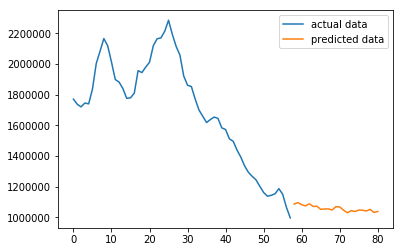

In [73]:
# making future prediction
flatten_ca_crude = ca_gas.reshape(-1)
val_ca_crude = flatten_ca_crude[-look_back:] # last batch in the training data
pred_list_ca_crude = []
for i_ca_crude in range(23): # predict the next 23 points
    pred_ca_crude = model_ca_crude.predict(val_ca_crude.reshape(1,1,look_back))
    pred_list_ca_crude = np.append(pred_list_ca_crude,pred_ca_crude)
    val_ca_crude = np.append(np.delete(val_ca_crude, 0),pred_ca_crude) # update the data batch to be fed in the next iteration
pred_list_ca_crude = pred_list_ca_crude.reshape(pred_list_ca_crude.shape[0],1)

# invert prediction
pred_list_ca_crude = scaler_ca_crude.inverse_transform(pred_list_ca_crude)

# plot
ca_crude_len = len(ca_crude)
print(ca_crude_len)
plt.plot(list(range(ca_crude_len)),scaler_ca_crude.inverse_transform(ca_crude),label="actual data")
plt.plot(list(range(ca_crude_len,ca_crude_len+len(pred_list_ca_crude))),pred_list_ca_crude,label="predicted data")
plt.legend()
plt.show()

In [93]:
# pred_list_ca_crude

# California Renewable Energy Production

In [94]:
# load data
ca_renew = pd.read_csv('state_cleaned1.csv', usecols=["REPRB CA"], engine='python')
ca_renew

,REPRB CA
0,270161
1,248178
2,329046
3,360333
4,331757
5,418518
6,375877
7,473192
8,397366
9,544918


In [96]:
# load data
ca_renew = pandas.read_csv('state_cleaned1.csv', usecols=["REPRB CA"], engine='python')

ca_renew = ca_renew.values
ca_renew = ca_renew.astype('float32')


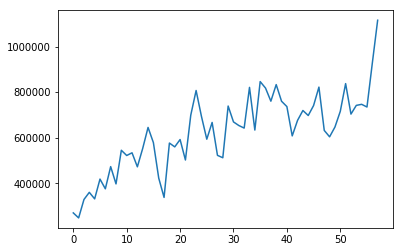

In [97]:
# load data
ca_renew = pd.read_csv('state_cleaned1.csv', usecols=["REPRB CA"], engine='python')

plt.plot(ca_renew)
plt.show()

In [99]:
scaler_ca_renew = MinMaxScaler(feature_range=(0, 1))
ca_renew = scaler_ca_renew.fit_transform(ca_renew)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [101]:
# split into train and test sets
train_size_ca_renew = int(len(ca_renew) * 0.67)
test_size_ca_renew = len(ca_renew) - train_size_ca_renew
train_ca_renew, test_ca_renew = ca_renew[0:train_size_ca_renew,:], ca_renew[train_size_ca_renew:len(ca_renew),:]

In [102]:
# convert an array of values into a dataset matrix
def create_ca_renew(ca_renew, look_back=1):
	dataX_ca_renew, dataY_ca_renew = [], []
	for i_ca_renew in range(len(ca_renew)-look_back-1):
		a_ca_renew = ca_renew[i_ca_renew:(i_ca_renew+look_back), 0]
		dataX_ca_renew.append(a_ca_renew)
		dataY_ca_renew.append(ca_renew[i_ca_renew + look_back, 0])
	return numpy.array(dataX_ca_renew), numpy.array(dataY_ca_renew)

In [103]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_renew, trainY_ca_renew = create_ca_renew(train_ca_renew, look_back)
testX_ca_renew, testY_ca_renew = create_ca_renew(test_ca_renew, look_back)

In [104]:
# reshape input to be [samples, time steps, features]
trainX_ca_renew = numpy.reshape(trainX_ca_renew, (trainX_ca_renew.shape[0], 1, trainX_ca_renew.shape[1]))
testX_ca_renew = numpy.reshape(testX_ca_renew, (testX_ca_renew.shape[0], 1, testX_ca_renew.shape[1]))

In [105]:
# create and fit the LSTM network
model_ca_renew = Sequential()
model_ca_renew.add(LSTM(4, input_shape=(1, look_back)))
model_ca_renew.add(Dense(1))
model_ca_renew.compile(loss='mean_squared_error', optimizer='adam')
model_ca_renew.fit(trainX_ca_renew, trainY_ca_renew, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.1536
Epoch 2/100
 - 0s - loss: 0.1111
Epoch 3/100
 - 0s - loss: 0.0787
Epoch 4/100
 - 0s - loss: 0.0554
Epoch 5/100
 - 0s - loss: 0.0414
Epoch 6/100
 - 0s - loss: 0.0319
Epoch 7/100
 - 0s - loss: 0.0271
Epoch 8/100
 - 0s - loss: 0.0246
Epoch 9/100
 - 0s - loss: 0.0236
Epoch 10/100
 - 0s - loss: 0.0229
Epoch 11/100
 - 0s - loss: 0.0225
Epoch 12/100
 - 0s - loss: 0.0223
Epoch 13/100
 - 0s - loss: 0.0219
Epoch 14/100
 - 0s - loss: 0.0215
Epoch 15/100
 - 0s - loss: 0.0214
Epoch 16/100
 - 0s - loss: 0.0210
Epoch 17/100
 - 0s - loss: 0.0208
Epoch 18/100
 - 0s - loss: 0.0207
Epoch 19/100
 - 0s - loss: 0.0202
Epoch 20/100
 - 0s - loss: 0.0199
Epoch 21/100
 - 0s - loss: 0.0196
Epoch 22/100
 - 0s - loss: 0.0193
Epoch 23/100
 - 0s - loss: 0.0192
Epoch 24/100
 - 0s - loss: 0.0191
Epoch 25/100
 - 0s - loss: 0.0187
Epoch 26/100
 - 0s - loss: 0.0184
Epoch 27/100
 - 0s - loss: 0.0183
Epoch 28/100
 - 0s - loss: 0.0180
Epoch 29/100
 - 0s - loss: 0.0180
Epoch 30/100
 - 0s - lo

In [107]:
# make predictions
trainPredict_ca_renew = model_ca_renew.predict(trainX_ca_renew)
testPredict_ca_renew = model_ca_renew.predict(testX_ca_renew)

In [108]:
# invert predictions
trainPredict_ca_renew = scaler_ca_renew.inverse_transform(trainPredict_ca_renew)
trainY_ca_renew = scaler_ca_renew.inverse_transform([trainY_ca_renew])
testPredict_ca_renew = scaler_ca_renew.inverse_transform(testPredict_ca_renew)
testY_ca_renew = scaler_ca_renew.inverse_transform([testY_ca_renew])
# calculate root mean squared error
trainScore_ca_renew = math.sqrt(mean_squared_error(trainY_ca_renew[0], trainPredict_ca_renew[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_renew))
testScore_ca_renew = math.sqrt(mean_squared_error(testY_ca_renew[0], testPredict_ca_renew[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_renew))

Train Score: 103353.26 RMSE
Test Score: 92722.31 RMSE


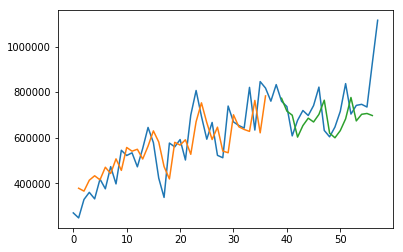

In [109]:
# shift train predictions for plotting
trainPredictPlot_ca_renew = numpy.empty_like(ca_renew)
trainPredictPlot_ca_renew[:, :] = numpy.nan
trainPredictPlot_ca_renew[look_back:len(trainPredict_ca_renew)+look_back, :] = trainPredict_ca_renew
# shift test predictions for plotting
testPredictPlot_ca_renew = numpy.empty_like(ca_renew)
testPredictPlot_ca_renew[:, :] = numpy.nan
testPredictPlot_ca_renew[len(trainPredict_ca_renew)+(look_back*2)+1:len(ca_renew)-1, :] = testPredict_ca_renew
# plot baseline and predictions
plt.plot(scaler_ca_renew.inverse_transform(ca_renew))
plt.plot(trainPredictPlot_ca_renew)
plt.plot(testPredictPlot_ca_renew)
plt.show()

In [111]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_renew, trainY_ca_renew = create_ca_renew(ca_renew, look_back)
trainX_ca_renew = numpy.reshape(trainX_ca_renew, (trainX_ca_renew.shape[0], 1, trainX_ca_renew.shape[1]))

# re-create and fit the LSTM network
model_ca_renew = Sequential()
model_ca_renew.add(LSTM(4, input_shape=(1, look_back)))
model_ca_renew.add(Dense(1))
model_ca_renew.compile(loss='mean_squared_error', optimizer='adam')
model_ca_renew.fit(trainX_ca_renew, trainY_ca_renew, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.1217
Epoch 2/100
 - 0s - loss: 0.0274
Epoch 3/100
 - 0s - loss: 0.0126
Epoch 4/100
 - 0s - loss: 0.0117
Epoch 5/100
 - 0s - loss: 0.0116
Epoch 6/100
 - 0s - loss: 0.0113
Epoch 7/100
 - 0s - loss: 0.0110
Epoch 8/100
 - 0s - loss: 0.0110
Epoch 9/100
 - 0s - loss: 0.0113
Epoch 10/100
 - 0s - loss: 0.0111
Epoch 11/100
 - 0s - loss: 0.0103
Epoch 12/100
 - 0s - loss: 0.0106
Epoch 13/100
 - 0s - loss: 0.0101
Epoch 14/100
 - 0s - loss: 0.0101
Epoch 15/100
 - 0s - loss: 0.0098
Epoch 16/100
 - 0s - loss: 0.0099
Epoch 17/100
 - 0s - loss: 0.0095
Epoch 18/100
 - 0s - loss: 0.0100
Epoch 19/100
 - 0s - loss: 0.0095
Epoch 20/100
 - 0s - loss: 0.0092
Epoch 21/100
 - 0s - loss: 0.0093
Epoch 22/100
 - 0s - loss: 0.0092
Epoch 23/100
 - 0s - loss: 0.0091
Epoch 24/100
 - 0s - loss: 0.0093
Epoch 25/100
 - 0s - loss: 0.0096
Epoch 26/100
 - 0s - loss: 0.0089
Epoch 27/100
 - 0s - loss: 0.0089
Epoch 28/100
 - 0s - loss: 0.0088
Epoch 29/100
 - 0s - loss: 0.0086
Epoch 30/100
 - 0s - lo

58


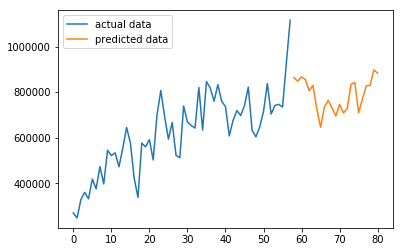

In [114]:
# making future prediction
flatten_ca_renew = ca_renew.reshape(-1)
val_ca_renew = flatten_ca_renew[-look_back:] # last batch in the training data
pred_list_ca_renew = []
for i_ca_renew in range(23): # predict the next 23 points
    pred_ca_renew = model_ca_renew.predict(val_ca_renew.reshape(1,1,look_back))
    pred_list_ca_renew = np.append(pred_list_ca_renew,pred_ca_renew)
    val_ca_renew= np.append(np.delete(val_ca_renew, 0),pred_ca_renew) # update the data batch to be fed in the next iteration
pred_list_ca_renew = pred_list_ca_renew.reshape(pred_list_ca_renew.shape[0],1)

# invert prediction
pred_list_ca_renew = scaler_ca_renew.inverse_transform(pred_list_ca_renew)

# plot
ca_renew_len = len(ca_renew)
print(ca_renew_len)
plt.plot(list(range(ca_renew_len)),scaler_ca_renew.inverse_transform(ca_renew),label="actual data")
plt.plot(list(range(ca_renew_len,ca_renew_len+len(pred_list_ca_renew))),pred_list_ca_renew,label="predicted data")
plt.legend()
plt.show()

In [116]:
# pred_list_ca_renew

# California Total Energy Production

In [117]:
# load data
ca_tp = pd.read_csv('state_cleaned1.csv', usecols=["TEPRB CA"], engine='python')
ca_tp

,TEPRB CA
0,2631707
1,2620632
2,2693123
3,2845524
4,2833855
5,3010487
6,3167320
7,3340273
8,3395904
9,3464304


In [118]:
# load data
ca_tp = pandas.read_csv('state_cleaned1.csv', usecols=["TEPRB CA"], engine='python')

ca_tp = ca_tp.values
ca_tp = ca_tp.astype('float32')

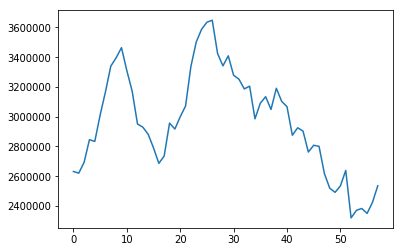

In [119]:
# load data
ca_tp = pd.read_csv('state_cleaned1.csv', usecols=["TEPRB CA"], engine='python')

plt.plot(ca_tp)
plt.show()

In [120]:
scaler_ca_tp = MinMaxScaler(feature_range=(0, 1))
ca_tp = scaler_ca_tp.fit_transform(ca_tp)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [121]:
# split into train and test sets
train_size_ca_tp = int(len(ca_tp) * 0.67)
test_size_ca_tp = len(ca_tp) - train_size_ca_tp
train_ca_tp, test_ca_tp = ca_tp[0:train_size_ca_tp,:], ca_tp[train_size_ca_tp:len(ca_tp),:]

In [122]:
# convert an array of values into a dataset matrix
def create_ca_tp(ca_tp, look_back=1):
	dataX_ca_tp, dataY_ca_tp = [], []
	for i_ca_tp in range(len(ca_tp)-look_back-1):
		a_ca_tp= ca_tp[i_ca_tp:(i_ca_tp+look_back), 0]
		dataX_ca_tp.append(a_ca_tp)
		dataY_ca_tp.append(ca_tp[i_ca_tp + look_back, 0])
	return numpy.array(dataX_ca_tp), numpy.array(dataY_ca_tp)

In [123]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_tp, trainY_ca_tp = create_ca_tp(train_ca_tp, look_back)
testX_ca_tp, testY_ca_tp = create_ca_tp(test_ca_tp, look_back)

In [124]:
# reshape input to be [samples, time steps, features]
trainX_ca_tp = numpy.reshape(trainX_ca_tp, (trainX_ca_tp.shape[0], 1, trainX_ca_tp.shape[1]))
testX_ca_tp = numpy.reshape(testX_ca_tp, (testX_ca_tp.shape[0], 1, testX_ca_tp.shape[1]))

In [125]:
# create and fit the LSTM network
model_ca_tp = Sequential()
model_ca_tp.add(LSTM(4, input_shape=(1, look_back)))
model_ca_tp.add(Dense(1))
model_ca_tp.compile(loss='mean_squared_error', optimizer='adam')
model_ca_tp.fit(trainX_ca_tp, trainY_ca_tp, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.3055
Epoch 2/100
 - 0s - loss: 0.2346
Epoch 3/100
 - 0s - loss: 0.1767
Epoch 4/100
 - 0s - loss: 0.1255
Epoch 5/100
 - 0s - loss: 0.0866
Epoch 6/100
 - 0s - loss: 0.0588
Epoch 7/100
 - 0s - loss: 0.0399
Epoch 8/100
 - 0s - loss: 0.0290
Epoch 9/100
 - 0s - loss: 0.0239
Epoch 10/100
 - 0s - loss: 0.0207
Epoch 11/100
 - 0s - loss: 0.0195
Epoch 12/100
 - 0s - loss: 0.0187
Epoch 13/100
 - 0s - loss: 0.0183
Epoch 14/100
 - 0s - loss: 0.0179
Epoch 15/100
 - 0s - loss: 0.0176
Epoch 16/100
 - 0s - loss: 0.0173
Epoch 17/100
 - 0s - loss: 0.0171
Epoch 18/100
 - 0s - loss: 0.0168
Epoch 19/100
 - 0s - loss: 0.0165
Epoch 20/100
 - 0s - loss: 0.0164
Epoch 21/100
 - 0s - loss: 0.0161
Epoch 22/100
 - 0s - loss: 0.0157
Epoch 23/100
 - 0s - loss: 0.0154
Epoch 24/100
 - 0s - loss: 0.0151
Epoch 25/100
 - 0s - loss: 0.0150
Epoch 26/100
 - 0s - loss: 0.0145
Epoch 27/100
 - 0s - loss: 0.0142
Epoch 28/100
 - 0s - loss: 0.0142
Epoch 29/100
 - 0s - loss: 0.0138
Epoch 30/100
 - 0s - lo

In [129]:
# make predictions
trainPredict_ca_tp = model_ca_tp.predict(trainX_ca_tp)
testPredict_ca_tp = model_ca_tp.predict(testX_ca_tp)

In [130]:
# invert predictions
trainPredict_ca_tp = scaler_ca_tp.inverse_transform(trainPredict_ca_tp)
trainY_ca_tp = scaler_ca_tp.inverse_transform([trainY_ca_tp])
testPredict_ca_tp = scaler_ca_tp.inverse_transform(testPredict_ca_tp)
testY_ca_tp = scaler_ca_tp.inverse_transform([testY_ca_tp])
# calculate root mean squared error
trainScore_ca_tp = math.sqrt(mean_squared_error(trainY_ca_tp[0], trainPredict_ca_tp[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_tp))
testScore_ca_tp = math.sqrt(mean_squared_error(testY_ca_tp[0], testPredict_ca_tp[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_tp))

Train Score: 117624.82 RMSE
Test Score: 166371.87 RMSE


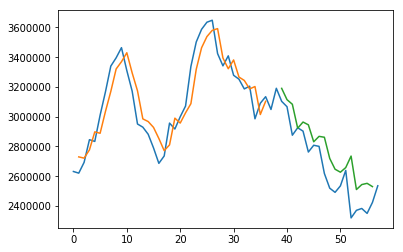

In [132]:
# shift train predictions for plotting
trainPredictPlot_ca_tp = numpy.empty_like(ca_tp)
trainPredictPlot_ca_tp[:, :] = numpy.nan
trainPredictPlot_ca_tp[look_back:len(trainPredict_ca_tp)+look_back, :] = trainPredict_ca_tp
# shift test predictions for plotting
testPredictPlot_ca_tp = numpy.empty_like(ca_tp)
testPredictPlot_ca_tp[:, :] = numpy.nan
testPredictPlot_ca_tp[len(trainPredict_ca_tp)+(look_back*2)+1:len(ca_tp)-1, :] = testPredict_ca_tp
# plot baseline and predictions
plt.plot(scaler_ca_tp.inverse_transform(ca_tp))
plt.plot(trainPredictPlot_ca_tp)
plt.plot(testPredictPlot_ca_tp)
plt.show()


In [133]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_tp, trainY_ca_tp = create_ca_tp(ca_tp, look_back)
trainX_ca_tp = numpy.reshape(trainX_ca_tp, (trainX_ca_tp.shape[0], 1, trainX_ca_tp.shape[1]))

# re-create and fit the LSTM network
model_ca_tp = Sequential()
model_ca_tp.add(LSTM(4, input_shape=(1, look_back)))
model_ca_tp.add(Dense(1))
model_ca_tp.compile(loss='mean_squared_error', optimizer='adam')
model_ca_tp.fit(trainX_ca_tp, trainY_ca_tp, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0671
Epoch 2/100
 - 0s - loss: 0.0393
Epoch 3/100
 - 0s - loss: 0.0307
Epoch 4/100
 - 0s - loss: 0.0257
Epoch 5/100
 - 0s - loss: 0.0206
Epoch 6/100
 - 0s - loss: 0.0156
Epoch 7/100
 - 0s - loss: 0.0124
Epoch 8/100
 - 0s - loss: 0.0094
Epoch 9/100
 - 0s - loss: 0.0083
Epoch 10/100
 - 0s - loss: 0.0076
Epoch 11/100
 - 0s - loss: 0.0050
Epoch 12/100
 - 0s - loss: 0.0050
Epoch 13/100
 - 0s - loss: 0.0048
Epoch 14/100
 - 0s - loss: 0.0047
Epoch 15/100
 - 0s - loss: 0.0048
Epoch 16/100
 - 0s - loss: 0.0042
Epoch 17/100
 - 0s - loss: 0.0042
Epoch 18/100
 - 0s - loss: 0.0043
Epoch 19/100
 - 0s - loss: 0.0042
Epoch 20/100
 - 0s - loss: 0.0043
Epoch 21/100
 - 0s - loss: 0.0039
Epoch 22/100
 - 0s - loss: 0.0045
Epoch 23/100
 - 0s - loss: 0.0043
Epoch 24/100
 - 0s - loss: 0.0040
Epoch 25/100
 - 0s - loss: 0.0041
Epoch 26/100
 - 0s - loss: 0.0038
Epoch 27/100
 - 0s - loss: 0.0038
Epoch 28/100
 - 0s - loss: 0.0040
Epoch 29/100
 - 0s - loss: 0.0045
Epoch 30/100
 - 0s - lo

58


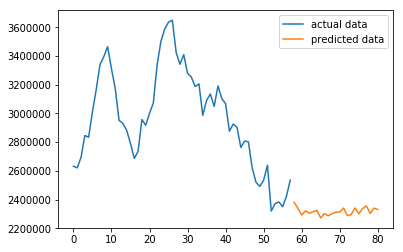

In [134]:
# making future prediction
flatten_ca_tp = ca_tp.reshape(-1)
val_ca_tp = flatten_ca_tp[-look_back:] # last batch in the training data
pred_list_ca_tp = []
for i_ca_tp in range(23): # predict the next 23 points
    pred_ca_tp = model_ca_tp.predict(val_ca_tp.reshape(1,1,look_back))
    pred_list_ca_tp = np.append(pred_list_ca_tp,pred_ca_tp)
    val_ca_tp = np.append(np.delete(val_ca_tp, 0),pred_ca_tp) # update the data batch to be fed in the next iteration
pred_list_ca_tp = pred_list_ca_tp.reshape(pred_list_ca_tp.shape[0],1)

# invert prediction
pred_list_ca_tp = scaler_ca_tp.inverse_transform(pred_list_ca_tp)

# plot
ca_tp_len = len(ca_tp)
print(ca_tp_len)
plt.plot(list(range(ca_tp_len)),scaler_ca_tp.inverse_transform(ca_tp),label="actual data")
plt.plot(list(range(ca_tp_len,ca_tp_len+len(pred_list_ca_tp))),pred_list_ca_tp,label="predicted data")
plt.legend()
plt.show()

In [136]:
# pred_list_ca_tp

# California Total Consumption Production

In [137]:
# load data
ca_cp = pd.read_csv('state_cleaned1.csv', usecols=["TETCB CA"], engine='python')
ca_cp

,TETCB CA
0,3449919
1,3609108
2,3724117
3,3923736
4,4219633
5,4385719
6,4645217
7,4841003
8,5115122
9,5356783


In [138]:
# load data
ca_cp = pandas.read_csv('state_cleaned1.csv', usecols=["TETCB CA"], engine='python')

ca_cp = ca_cp.values
ca_cp = ca_cp.astype('float32')

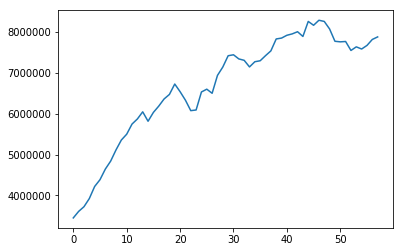

In [151]:
# load data
ca_cp = pd.read_csv('state_cleaned1.csv', usecols=["TETCB CA"], engine='python')

plt.plot(ca_cp)
plt.show()

In [152]:
scaler_ca_cp = MinMaxScaler(feature_range=(0, 1))
ca_cp = scaler_ca_cp.fit_transform(ca_cp)

C:\Users\ayoti\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [153]:
# split into train and test sets
train_size_ca_cp = int(len(ca_cp) * 0.67)
test_size_ca_cp = len(ca_cp) - train_size_ca_cp
train_ca_cp, test_ca_cp = ca_cp[0:train_size_ca_cp,:], ca_cp[train_size_ca_cp:len(ca_cp),:]

In [154]:
# convert an array of values into a dataset matrix
def create_ca_cp(ca_cp, look_back=1):
	dataX_ca_cp, dataY_ca_cp = [], []
	for i_ca_cp in range(len(ca_cp)-look_back-1):
		a_ca_cp = ca_cp[i_ca_cp:(i_ca_cp+look_back), 0]
		dataX_ca_cp.append(a_ca_cp)
		dataY_ca_cp.append(ca_cp[i_ca_cp + look_back, 0])
	return numpy.array(dataX_ca_cp), numpy.array(dataY_ca_cp)

In [156]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_ca_cp, trainY_ca_cp = create_ca_cp(train_ca_cp, look_back)
testX_ca_cp, testY_ca_cp = create_ca_cp(test_ca_cp, look_back)

In [157]:
# reshape input to be [samples, time steps, features]
trainX_ca_cp = numpy.reshape(trainX_ca_cp, (trainX_ca_cp.shape[0], 1, trainX_ca_cp.shape[1]))
testX_ca_cp = numpy.reshape(testX_ca_cp, (testX_ca_cp.shape[0], 1, testX_ca_cp.shape[1]))

In [158]:
# create and fit the LSTM network
model_ca_cp = Sequential()
model_ca_cp.add(LSTM(4, input_shape=(1, look_back)))
model_ca_cp.add(Dense(1))
model_ca_cp.compile(loss='mean_squared_error', optimizer='adam')
model_ca_cp.fit(trainX_ca_cp, trainY_ca_cp, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.2626
Epoch 2/100
 - 0s - loss: 0.1967
Epoch 3/100
 - 0s - loss: 0.1445
Epoch 4/100
 - 0s - loss: 0.1036
Epoch 5/100
 - 0s - loss: 0.0730
Epoch 6/100
 - 0s - loss: 0.0502
Epoch 7/100
 - 0s - loss: 0.0365
Epoch 8/100
 - 0s - loss: 0.0274
Epoch 9/100
 - 0s - loss: 0.0227
Epoch 10/100
 - 0s - loss: 0.0203
Epoch 11/100
 - 0s - loss: 0.0188
Epoch 12/100
 - 0s - loss: 0.0179
Epoch 13/100
 - 0s - loss: 0.0173
Epoch 14/100
 - 0s - loss: 0.0163
Epoch 15/100
 - 0s - loss: 0.0158
Epoch 16/100
 - 0s - loss: 0.0151
Epoch 17/100
 - 0s - loss: 0.0143
Epoch 18/100
 - 0s - loss: 0.0137
Epoch 19/100
 - 0s - loss: 0.0130
Epoch 20/100
 - 0s - loss: 0.0125
Epoch 21/100
 - 0s - loss: 0.0118
Epoch 22/100
 - 0s - loss: 0.0111
Epoch 23/100
 - 0s - loss: 0.0105
Epoch 24/100
 - 0s - loss: 0.0099
Epoch 25/100
 - 0s - loss: 0.0093
Epoch 26/100
 - 0s - loss: 0.0088
Epoch 27/100
 - 0s - loss: 0.0082
Epoch 28/100
 - 0s - loss: 0.0078
Epoch 29/100
 - 0s - loss: 0.0072
Epoch 30/100
 - 0s - lo

In [159]:
# make predictions
trainPredict_ca_cp = model_ca_cp.predict(trainX_ca_cp)
testPredict_ca_cp = model_ca_cp.predict(testX_ca_cp)

In [160]:
# invert predictions
trainPredict_ca_cp = scaler_ca_cp.inverse_transform(trainPredict_ca_cp)
trainY_ca_cp = scaler_ca_cp.inverse_transform([trainY_ca_cp])
testPredict_ca_cp = scaler_ca_cp.inverse_transform(testPredict_ca_cp)
testY_ca_cp = scaler_ca_cp.inverse_transform([testY_ca_cp])
# calculate root mean squared error
trainScore_ca_cp = math.sqrt(mean_squared_error(trainY_ca_cp[0], trainPredict_ca_cp[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_ca_cp))
testScore_ca_cp = math.sqrt(mean_squared_error(testY_ca_cp[0], testPredict_ca_cp[:,0]))
print('Test Score: %.2f RMSE' % (testScore_ca_cp))

Train Score: 170413.45 RMSE
Test Score: 153407.25 RMSE


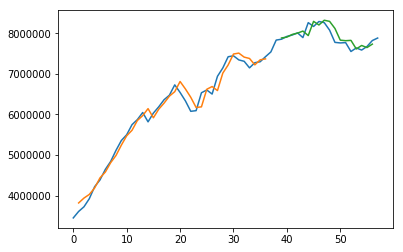

In [163]:
# shift train predictions for plotting
trainPredictPlot_ca_cp = numpy.empty_like(ca_cp)
trainPredictPlot_ca_cp[:, :] = numpy.nan
trainPredictPlot_ca_cp[look_back:len(trainPredict_ca_cp)+look_back, :] = trainPredict_ca_cp
# shift test predictions for plotting
testPredictPlot_ca_cp = numpy.empty_like(ca_cp)
testPredictPlot_ca_cp[:, :] = numpy.nan
testPredictPlot_ca_cp[len(trainPredict_ca_cp)+(look_back*2)+1:len(ca_cp)-1, :] = testPredict_ca_cp
# plot baseline and predictions
plt.plot(scaler_ca_cp.inverse_transform(ca_cp))
plt.plot(trainPredictPlot_ca_cp)
plt.plot(testPredictPlot_ca_cp)
plt.show()


In [165]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_ca_cp, trainY_ca_cp = create_ca_cp(ca_cp, look_back)
trainX_ca_cp = numpy.reshape(trainX_ca_cp, (trainX_ca_cp.shape[0], 1, trainX_ca_cp.shape[1]))

# re-create and fit the LSTM network
model_ca_cp = Sequential()
model_ca_cp.add(LSTM(4, input_shape=(1, look_back)))
model_ca_cp.add(Dense(1))
model_ca_cp.compile(loss='mean_squared_error', optimizer='adam')
model_ca_cp.fit(trainX_ca_cp, trainY_ca_cp, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.6326
Epoch 2/100
 - 0s - loss: 0.2070
Epoch 3/100
 - 0s - loss: 0.0442
Epoch 4/100
 - 0s - loss: 0.0126
Epoch 5/100
 - 0s - loss: 0.0082
Epoch 6/100
 - 0s - loss: 0.0071
Epoch 7/100
 - 0s - loss: 0.0066
Epoch 8/100
 - 0s - loss: 0.0057
Epoch 9/100
 - 0s - loss: 0.0054
Epoch 10/100
 - 0s - loss: 0.0051
Epoch 11/100
 - 0s - loss: 0.0046
Epoch 12/100
 - 0s - loss: 0.0043
Epoch 13/100
 - 0s - loss: 0.0041
Epoch 14/100
 - 0s - loss: 0.0039
Epoch 15/100
 - 0s - loss: 0.0040
Epoch 16/100
 - 0s - loss: 0.0037
Epoch 17/100
 - 0s - loss: 0.0035
Epoch 18/100
 - 0s - loss: 0.0034
Epoch 19/100
 - 0s - loss: 0.0036
Epoch 20/100
 - 0s - loss: 0.0033
Epoch 21/100
 - 0s - loss: 0.0032
Epoch 22/100
 - 0s - loss: 0.0031
Epoch 23/100
 - 0s - loss: 0.0030
Epoch 24/100
 - 0s - loss: 0.0029
Epoch 25/100
 - 0s - loss: 0.0029
Epoch 26/100
 - 0s - loss: 0.0028
Epoch 27/100
 - 0s - loss: 0.0029
Epoch 28/100
 - 0s - loss: 0.0026
Epoch 29/100
 - 0s - loss: 0.0027
Epoch 30/100
 - 0s - lo

58


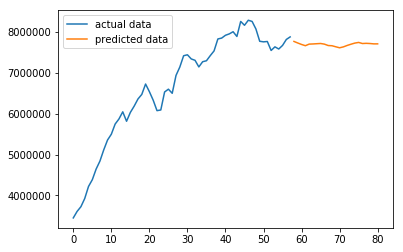

In [169]:
# making future prediction
flatten_ca_cp = ca_cp.reshape(-1)
val_ca_cp = flatten_ca_cp[-look_back:] # last batch in the training data
pred_list_ca_cp = []
for i_ca_cp in range(23): # predict the next 23 points
    pred_ca_cp = model_ca_cp.predict(val_ca_cp.reshape(1,1,look_back))
    pred_list_ca_cp = np.append(pred_list_ca_cp,pred_ca_cp)
    val_ca_cp = np.append(np.delete(val_ca_cp, 0),pred_ca_cp) # update the data batch to be fed in the next iteration
pred_list_ca_cp = pred_list_ca_cp.reshape(pred_list_ca_cp.shape[0],1)

# invert prediction
pred_list_ca_cp = scaler_ca_cp.inverse_transform(pred_list_ca_cp)

# plot
ca_cp_len = len(ca_cp)
print(ca_cp_len)
plt.plot(list(range(ca_cp_len)),scaler_ca_cp.inverse_transform(ca_cp),label="actual data")
plt.plot(list(range(ca_cp_len,ca_cp_len+len(pred_list_ca_cp))),pred_list_ca_cp,label="predicted data")
plt.legend()
plt.show()

In [180]:
# pred_list_ca_cp

# Merge Predictions

In [261]:
pred_coal = pred_list_ca_coal.tolist()
pred_gas = pred_list_ca_gas.tolist()
pred_crude = pred_list_ca_crude.tolist()
pred_renew = pred_list_ca_renew.tolist()
pred_tp = pred_list_ca_tp.tolist()
pred_cp = pred_list_ca_cp.tolist()

In [262]:
pred_df = pd.DataFrame(list(zip(pred_years, pred_coal, pred_gas, pred_crude, pred_renew, pred_tp, pred_cp)),
              columns=['Year',"CLPRB CA", "NGMPB CA", "PAPRB CA", "REPRB CA", "TEPRB CA", "TETCB CA"])
pred_df


,Year,CLPRB CA,NGMPB CA,PAPRB CA,REPRB CA,TEPRB CA,TETCB CA
0,2018,[178041013781.60736],[243316.07600934058],[1086916.4120229036],[862814.9548417926],[2380814.946954958],[7770731.694007158]
1,2019,[700684743709.4922],[242025.61702048779],[1096104.5968910903],[848008.2591846585],[2339708.5966693787],[7732100.7538410425]
2,2020,[760544218598.0802],[231846.62675757706],[1082305.6788143963],[866928.2704213858],[2292572.01516724],[7696234.296792984]
3,2021,[1048851735241.3116],[236704.6221526265],[1074583.879371658],[855163.521132946],[2321092.470093443],[7665910.939920187]
4,2022,[1137085400406.0107],[225949.60488975048],[1088978.7253773212],[806008.8185055256],[2304996.629316303],[7705070.6047894955]
5,2023,[1418510866721.4517],[215997.84614846855],[1071167.9499251544],[829557.9572145939],[2314855.4645398958],[7708754.082399845]
6,2024,[1626401578335.2988],[207947.89341493696],[1072524.2546593845],[726644.6465519071],[2323984.716508637],[7714757.256716728]
7,2025,[1781733025846.8928],[199916.54316469282],[1052554.7876342237],[645921.9976655245],[2271944.8386556283],[7720130.461174488]
8,2026,[1903335506099.3489],[198369.18531160057],[1054237.1670467854],[734119.4224401712],[2302350.0594002893],[7704354.100609064]
9,2027,[1187040551473.0173],[189605.96839007735],[1055597.3991190046],[764128.8208408356],[2286677.7199629284],[7670336.305111885]


In [263]:
pred_df2 = pd.DataFrame(pred_df)
pred_df2

,Year,CLPRB CA,NGMPB CA,PAPRB CA,REPRB CA,TEPRB CA,TETCB CA
0,2018,[178041013781.60736],[243316.07600934058],[1086916.4120229036],[862814.9548417926],[2380814.946954958],[7770731.694007158]
1,2019,[700684743709.4922],[242025.61702048779],[1096104.5968910903],[848008.2591846585],[2339708.5966693787],[7732100.7538410425]
2,2020,[760544218598.0802],[231846.62675757706],[1082305.6788143963],[866928.2704213858],[2292572.01516724],[7696234.296792984]
3,2021,[1048851735241.3116],[236704.6221526265],[1074583.879371658],[855163.521132946],[2321092.470093443],[7665910.939920187]
4,2022,[1137085400406.0107],[225949.60488975048],[1088978.7253773212],[806008.8185055256],[2304996.629316303],[7705070.6047894955]
5,2023,[1418510866721.4517],[215997.84614846855],[1071167.9499251544],[829557.9572145939],[2314855.4645398958],[7708754.082399845]
6,2024,[1626401578335.2988],[207947.89341493696],[1072524.2546593845],[726644.6465519071],[2323984.716508637],[7714757.256716728]
7,2025,[1781733025846.8928],[199916.54316469282],[1052554.7876342237],[645921.9976655245],[2271944.8386556283],[7720130.461174488]
8,2026,[1903335506099.3489],[198369.18531160057],[1054237.1670467854],[734119.4224401712],[2302350.0594002893],[7704354.100609064]
9,2027,[1187040551473.0173],[189605.96839007735],[1055597.3991190046],[764128.8208408356],[2286677.7199629284],[7670336.305111885]


In [264]:
prior_list = pd.read_csv('state_cleaned1.csv')
prior_list = prior_list[["Year", "CLPRB CA", "NGMPB CA", "PAPRB CA", "REPRB CA", "TEPRB CA", "TETCB CA"]]
prior_list

,Year,CLPRB CA,NGMPB CA,PAPRB CA,REPRB CA,TEPRB CA,TETCB CA
0,1960,0,590504,1771042,270161,2631707,3449919
1,1961,0,634667,1737732,248178,2620632,3609108
2,1962,0,643771,1720222,329046,2693123,3724117
3,1963,0,737636,1745266,360333,2845524,3923736
4,1964,0,757678,1740052,331757,2833855,4219633
5,1965,0,753494,1835282,418518,3010487,4385719
6,1966,0,786837,2002711,375877,3167320,4645217
7,1967,0,777108,2083470,473192,3340273,4841003
8,1968,0,815688,2165847,397366,3395904,5115122
9,1969,0,773239,2119020,544918,3464304,5356783


In [244]:
df_merge_col = prior_list.append(pred_df)

df_merge_col

,Year,CLPRB CA,NGMPB CA,PAPRB CA,REPRB CA,TEPRB CA,TETCB CA
0,1960,0,590504,1771042,270161,2631707,3449919
1,1961,0,634667,1737732,248178,2620632,3609108
2,1962,0,643771,1720222,329046,2693123,3724117
3,1963,0,737636,1745266,360333,2845524,3923736
4,1964,0,757678,1740052,331757,2833855,4219633
5,1965,0,753494,1835282,418518,3010487,4385719
6,1966,0,786837,2002711,375877,3167320,4645217
7,1967,0,777108,2083470,473192,3340273,4841003
8,1968,0,815688,2165847,397366,3395904,5115122
9,1969,0,773239,2119020,544918,3464304,5356783


In [268]:
df_merge_col.to_csv("Cali.csv")